In [1]:
import pandas as pd

df_private = pd.read_csv("cleaned_data_private.csv")
df_private.head(5)

,location,title,url,postdate,content
0,천안 운동장 애견카페,천안애견카페 포토존에 강아지운동장 있는 날아라멍멍,https://blog.naver.com/kskr3105/223430968747,2024-04-29,​ ​ 오랜만에강아지운동장에서 뛰뛰시키고 싶어서천안애견카페날아라멍멍을 찾았어요. 주...
1,천안 운동장 애견카페,천안 애견카페 평생함께 잔디운동장과 포토존이 가득,https://blog.naver.com/nahe0904/223445138495,2024-05-13,​ ​ 오늘 포스팅의 주인공은 제가 아닌 심바🦁에요 ​ 5월5일 개린이날에는 비가 ...
2,천안 운동장 애견카페,"천안애견카페, 넓은 실내와 운동장 청당동 하트멍",https://blog.naver.com/085102/223032381332,2023-03-02,천안 청당동에 오픈한지 얼마 안된 애견카페가 있어다녀왔다 사모예드 하트 견주님이 운...
3,천안 운동장 애견카페,천안애견카페:)멍자네_천안 입장료 없는 넓은 야외운동장,https://blog.naver.com/b590316/223401019706,2024-03-31,안녕하세요 애견카페 뿌수는 구월이에요^^ 오늘은 천안에 위치한<멍자네>에 다녀왔습니...
4,천안 운동장 애견카페,천안 아산 운동장 넓은 애견 카페 멍마일 후기,https://blog.naver.com/inmy_garden/223324009407,2024-01-16,천안뿐만 아니라 아산 근교로도 괜찮은 애견카페가 어딨나 여기저기 찾아보며 다니고 있...


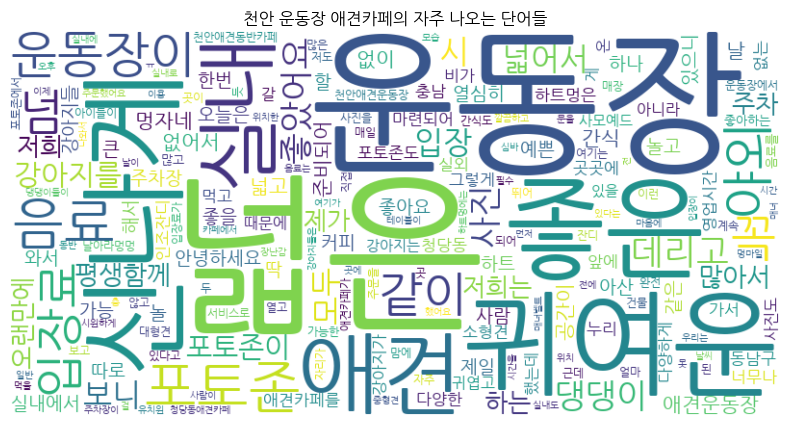

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

plt.rc('font', family='NanumGothic') 
%matplotlib inline

# 한글 폰트 경로 설정 (예: 나눔고딕 폰트)
font_path = 'C:/tobigs/etc/Fonts/NanumGothic.ttf'

# 불용어
stopwords = [
    "ㅎㅎㅎ", "ㅋㅋㅋㅋ", "ㅋㅋㅋ", "ㅎㅎ", "ㅋㅋ","ㅋ", "^^", "^^;", "ㅠㅠ", "ㅠㅠㅠ", "ㅜㅜ", "ㅜㅜㅜ", "으음", "오잉", 
    "아유", "와", "오", "아", "어머", "헐", "대박", "아아", "음", "음...", "어휴", "후", "그리고", "그래서", 
    "그러나", "하지만", "그렇지만", "그런데", "그러니까", "그러면", "그렇다고", "또는", "또한", "그렇지만", 
    "게다가", "따라서", "왜냐하면", "뭐든지", "게다가", "그러면서", "결국", "이와 함께", "그럼에도 불구하고", 
    "그랬더니", "또한", "도대체", "도리어", "즉", "물론", "덕분에", "말하자면", "결국", "어쨌든", "더군다나", 
    "마침", "결국은", "결국에는", "그", "이", "저", "나", "우리", "너", "내", "니", "네", "그렇지", 
    "그냥", "좀", "아주", "매우", "진짜", "정말", "사실", "솔직히", "사실은", "진짜로", "매우", "엄청", 
    "너무", "좀", "약간", "정말로", "진심으로", "진짜로", "사실상", "사실은", "분명히", "확실히", "뭐", 
    "사실", "대체로", "의외로", "생각보다", "또", "역시", "역시나", "그럼", "그저", "게다가", "아마", 
    "사실", "말하자면", "물론", "결국", "바로", "다만", "또한", "일단", "참", "오히려", "무엇보다", 
    "어쨌든", "마치", "대체로", "의외로", "정말", "아주", "무척", "대단히", "극도로", "상당히", "별로", 
    "거의", "과연", "그래도", "그래야", "그렇지 않으면", "그래", "그렇지 않다", "과연", "어쩌면", "아마도", 
    "반드시", "거의", "대충", "적어도", "다행히도", "어쩐지", "아무래도", "어쩔 수 없이", "다만", "조금", 
    "많이", "여러 가지", "많다", "그렇다", "그렇다 보니", "이렇게", "저렇게", "결국", "대체로", "예상보다", 
    "예상대로", "그대로", "그런 점에서", "여기", "저기", "거기", "어디", "오늘", "내일", "어제", "지금", 
    "방금", "그때", "이때", "저번에", "다녀왔다", "다녀옴", "방문", "방문함", "마지막으로", "결국", "중간에", 
    "처음에", "결국은", "지난번에", "나중에", "이번에", "이제서야", "다시", "또", "벌써", "처음으로", 
    "마지막으로", "인 것 같다", "볼 수 있다", "있다 보니", "하다 보니", "생각이 든다", "해 보니", "하고 나서", 
    "가는 길에", "다녀왔다", "가봤다", "해봤다", "하는데", "봤다", "되어 있다", "생각이 든다", "하는 중이다", 
    "하는 거다", "알고 보니", "확인해 보니", "해보니", "다녀오고", "그리고 나서", "다녀오고 보니", "다시 가고 싶다", 
    "가기 전에", "먹고 나서", "마시고 나서", "걸어가다 보니", "걸어가다", "걸어오다", "가보니", "갔더니",
    "반려동물", "반려견", "반려인", "쉼터", "도솔광장", "천안축구센터", "축구센터", "있어요", "있습니다",
    "수", "있어서", "더", "한", "저는", "축구센터에", "하고", "반려인쉼터", "안", "있지만", "아직",
    "위해", "등", "있는", "및", "것", "있다", "위한", "말했다", "있도록", "합니다", "천안시유기동물보호소는",
    "같아요", "있고", "백석동", "천안시", "천안", "고독사시민의", "월", "일", "잘", "며", "통해", "만", "년",
    "newsblock", "뉴스블럭", "tv", "펫티켓", "펫", "Newsblock", "중", "강아지", "고", "번", "오세요", "분",
    "원", "다", "인", "있었어요", "애견카페", "다른", "천안애견카페", "하트멍", "자희", "kg", "있어",
    "때", "함께", "있는데", "카페", "강아지들이", "해요", "날씨가", "거"
]

# 불용어 제거 함수
def remove_stopwords(text):

    text = re.sub(r'\d+', '', text)  # 숫자 제거
    words = re.findall(r'\b\w+\b', text)
    filtered_words = [word for word in words if word not in stopwords]
    return " ".join(filtered_words)

locations = df_private['location'].unique()

for location in locations:
    location_content = df_private[df_private['location'] == location]['content'].dropna()
    combined_text = " ".join(location_content.apply(remove_stopwords))
    
    # 단어의 빈도 계산
    word_counts = Counter(combined_text.split())
    
    wordcloud = WordCloud(
        font_path=font_path, 
        width=800, 
        height=400, 
        background_color='white'
    ).generate_from_frequencies(word_counts)
    
    # 워드클라우드 표시
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"{location}의 자주 나오는 단어들")
    plt.axis("off")
    plt.show()